In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import intel_extension_for_pytorch as ipex
from chronos import ChronosPipeline
torch.xpu.is_available()
#torch.cpu.is_available()

/home/sdp/.conda/envs/ag/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


True

In [4]:
df = pd.read_csv("electricity_cleaned.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"],format="%m/%d/%y %H:%M")
df.set_index("timestamp")
df.columns[0]
df.tail()

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17543,2017-12-31 23:00:00,11.8223,136.1263,3.3686,82.4959,103.7540,462.0892,42.6952,35.6069,16.0031,...,96.325,677.400,113.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#dfs = pd.read_csv("Cemex2.csv")
#dfs["timestamp"] = pd.to_datetime(dfs["timestamp"],format="%m/%d/%y %H:%M")
from gluonts.dataset.pandas import PandasDataset 
ds = PandasDataset(dict(df),freq="1h")
prediction_length = 24

In [85]:
# Get List by Column Index
tensor_list = [torch.tensor(df.loc[10000:10100,'Mouse_health_Estela'].values),torch.tensor(df.loc[10000:10100,'Mouse_health_Justin'].values)]
print("Size of the tensor list: ", tensor_list[1].size())
print("Dimensions of the tensor list: ",tensor_list[1].ndimension())

#for i in range(1,1578):
#    list1[i-1]= torch.tensor(df[df.columns[i]].values)
#    print("Size of the tensor list: ", list[i-1])

Size of the tensor list:  torch.Size([101])
Dimensions of the tensor list:  1


In [ ]:
#tensor_list = torch.tensor(df[df.columns[1:1578]].values.tolist())
#tensor_list = torch.tensor(df[df.columns[1:1578]])
#tensor = torch.tensor(dict(df))
#print("Size of the tensor list: ", tensor_list.size())
#print("Dimensions of the tensor list: ",tensor_list.ndimension())
#print("Timeseries list:", tensor_list)

In [18]:
%%time
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)
prediction_length = 24
forecast_set = []
for j in range(1,1578):
    print(j)
    context = df.iloc[-8670:-prediction_length,j].values
#    print(context)
#    mean, scale = context.mean(), context.std()
#    norm_context = (context - mean) / scale
    forecast_j = pipeline.predict(
        torch.tensor(context),
#        prediction_length=1
    )[0].numpy()
#    forecast_j = forecast_j * scale + mean
    forecast_set.append(forecast_j)
forecast_set = np.concatenate(forecast_set, axis=-1)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
#context = torch.tensor(tensor_list[1])
#forecast = pipeline.predict(context, prediction_length, limit_prediction_length=0)

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [19]:
%%time
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="xpu",
  torch_dtype=torch.bfloat16,
)
prediction_length = 24
forecast_set = []
for j in range(1,1578):
    print(j)
    context = df.iloc[-8670:-prediction_length,j].values
#    print(context)
#    mean, scale = context.mean(), context.std()
#    norm_context = (context - mean) / scale
    forecast_j = pipeline.predict(
        torch.tensor(context),
#        prediction_length=1
    )[0].numpy()
#    forecast_j = forecast_j * scale + mean
    forecast_set.append(forecast_j)
forecast_set = np.concatenate(forecast_set, axis=-1)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
#context = torch.tensor(tensor_list[1])
#forecast = pipeline.predict(context, prediction_length, limit_prediction_length=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [13]:
%%time
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="xpu",
  torch_dtype=torch.bfloat16,
)
prediction_length = 24
forecast_set = []
for j in range(1,1578):
    print(j)
    context = df.iloc[-8670:-prediction_length,j].values
#    print(context)
#    mean, scale = context.mean(), context.std()
#    norm_context = (context - mean) / scale
    forecast_j = pipeline.predict(
        torch.tensor(context),
#        prediction_length=1
    )[0].numpy()
#    forecast_j = forecast_j * scale + mean
    forecast_set.append(forecast_j)
forecast_set = np.concatenate(forecast_set, axis=-1)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
#context = torch.tensor(tensor_list)
#forecast = pipeline.predict(context, prediction_length, limit_prediction_length=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [21]:
%%time
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="xpu",
  torch_dtype=torch.bfloat16,
)
prediction_length = 24
context_length=500
forecast_set = []
for j in range(1,1578):
    print(j)
    context = df.iloc[-context_length-prediction_length:-prediction_length,j].values
#    print(context)
#    mean, scale = context.mean(), context.std()
#    norm_context = (context - mean) / scale
    forecast_j = pipeline.predict(
        torch.tensor(context),
#        prediction_length=1
    )[0].numpy()
#    forecast_j = forecast_j * scale + mean
    forecast_set.append(forecast_j)
forecast_set = np.concatenate(forecast_set, axis=-1)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
#context = torch.tensor(tensor_list)
#forecast = pipeline.predict(context, prediction_length, limit_prediction_length=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [22]:
%%time
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-mini",
  device_map="xpu",
  torch_dtype=torch.bfloat16,
)
prediction_length = 24
context_length=500
forecast_set = []
for j in range(1,1578):
    print(j)
    context = df.iloc[-context_length-prediction_length:-prediction_length,j].values
#    print(context)
#    mean, scale = context.mean(), context.std()
#    norm_context = (context - mean) / scale
    forecast_j = pipeline.predict(
        torch.tensor(context),
#        prediction_length=1
    )[0].numpy()
#    forecast_j = forecast_j * scale + mean
    forecast_set.append(forecast_j)
forecast_set = np.concatenate(forecast_set, axis=-1)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
#context = torch.tensor(tensor_list)
#forecast = pipeline.predict(context, prediction_length, limit_prediction_length=0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


ValueError: x and y must have same first dimension, but have shapes (100928,) and (1,)

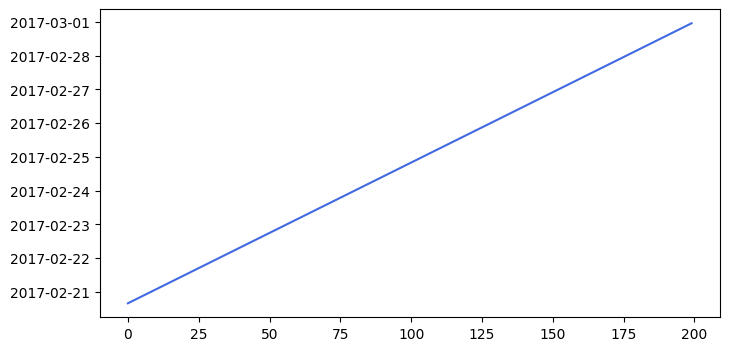

In [17]:
# visualize the forecast
#forecast_index = range(len(df), len(df) + prediction_length)
forecast_index = range(100,100 + prediction_length)
low, median, high = np.quantile(forecast_set[1], [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
#plt.plot(df.loc[10000:10200,'Mouse_health_Estela'].values, color="royalblue", label="historical data")
plt.plot(df.iloc[10000:10200,0].values, color="royalblue", label="historical data")
plt.plot(forecast_set[1], median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
ax = plt.gca()
ax.set_xlim([0,150])
plt.legend()
plt.grid()
plt.show()

In [42]:
print(ChronosPipeline.predict.__doc__)


        Get forecasts for the given time series.

        Parameters
        ----------
        context
            Input series. This is either a 1D tensor, or a list
            of 1D tensors, or a 2D tensor whose first dimension
            is batch. In the latter case, use left-padding with
            ``torch.nan`` to align series of different lengths.
        prediction_length
            Time steps to predict. Defaults to what specified
            in ``self.model.config``.
        num_samples
            Number of sample paths to predict. Defaults to what
            specified in ``self.model.config``.
        temperature
            Temperature to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        top_k
            Top-k parameter to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        top_p
            Top-p parameter to use for generating sample tokens.
            